In [1]:
import tensorflow as tf

In [2]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

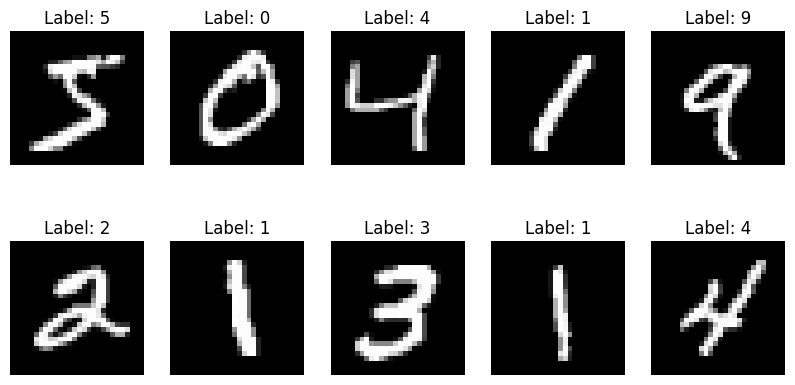

In [5]:
# Visualize the first few samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [6]:
# Step 4: Build a simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 1D array
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer for 10 classes
])


C:\Users\mukesh choudhary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8654 - loss: 0.4706 - val_accuracy: 0.9532 - val_loss: 0.1575
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9601 - loss: 0.1374 - val_accuracy: 0.9609 - val_loss: 0.1380
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9729 - loss: 0.0907 - val_accuracy: 0.9684 - val_loss: 0.1050
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9800 - loss: 0.0670 - val_accuracy: 0.9677 - val_loss: 0.1022
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9857 - loss: 0.0499 - val_accuracy: 0.9654 - val_loss: 0.1202


In [9]:
# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.2f}")


313/313 - 1s - 2ms/step - accuracy: 0.9668 - loss: 0.1087
Test accuracy: 0.97


In [10]:
# Step 7: Make predictions on test data
predictions = model.predict(x_test[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


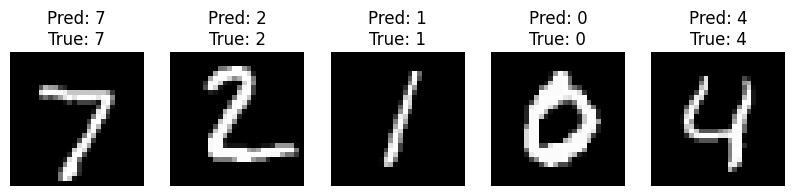

In [11]:
# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.show()

